# Итоговый проект

In [1]:
from google.colab import drive
drive.mount('/gdrive' )

Mounted at /gdrive


In [2]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [101]:
data_train = pd.read_csv('/gdrive/My Drive/data/fashion-mnist_train.csv')
X_train = data_train.drop('label', axis = 1)
y_train = data_train['label']
data_test = pd.read_csv('/gdrive/My Drive/data/fashion-mnist_test.csv')
X_test = data_test.drop('label', axis = 1)
y_test = data_test['label']

In [14]:
num_classes = len(np.unique(y_train))
print (num_classes)

10


In [102]:
X_train = np.array(X_train.values)
X_test = np.array(X_test.values)

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

X_train = X_train.astype('float')
X_test = X_test.astype('float')

X_train /= 255
X_test /= 255

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

### Линейная регрессия

In [81]:
def linear_regression(input_shape):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(num_classes, activation='softmax', input_shape = input_shape))
    model.compile(loss='categorical_crossentropy', 
                  optimizer='SGD', 
                  metrics=['accuracy'])
    return model

In [83]:
model = linear_regression((X_train.shape[1], ))
scores = []
for epochs in range(1, 10):
  _ = model.fit(
      X_train, y_train,
      epochs = epochs,
      verbose = 0
  )
  _, score = model.evaluate(X_test, y_test, verbose=0)
  scores.append(score)

In [84]:
import matplotlib.pyplot as plt
%matplotlib inline

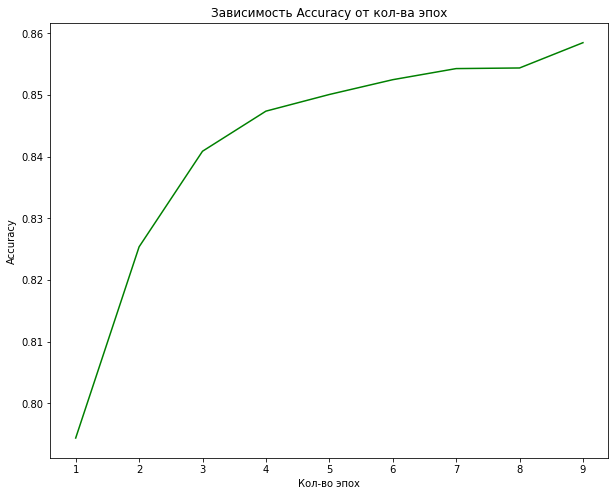

In [85]:
plt.figure(figsize=(10, 8))
plt.plot(range(1, 10), scores, color = 'green')
plt.xlabel('Кол-во эпох')
plt.ylabel('Accuracy')
plt.title('Зависимость Accuracy от кол-ва эпох')
plt.show()

Как мы видим, самое хорошее качество было при epochs = 9


In [87]:
score_lr = scores[8]
print(score_lr)

0.8585


### Полносвязная нейронная сеть

In [103]:
def neural_network(input_shape):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(784, activation='relu', input_shape=(784,)))
    model.add(tf.keras.layers.Dense(512, activation='relu'))
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])
    return model

In [104]:
model = neural_network((X_train.shape[1], ))
model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs = 5,
    verbose = 0
)
_, score_neural_network = model.evaluate(X_test, y_test, verbose= 0)
print (score_neural_network)

0.8838


Качасвто модели возросло до 88%, это хорошо

### Сверточная нейронная сеть

In [105]:
def conv_net_1(input_shape):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Convolution2D(32, (3,3), input_shape=input_shape, activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((2,2)))
    model.add(tf.keras.layers.Convolution2D(64, (3,3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((2,2)))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', 
                  optimizer= 'adam', 
                  metrics=['accuracy'])
    return model

In [106]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [107]:
model = conv_net_1((28, 28, 1))
model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs = 5,
    verbose = 0
)

_, score_conv_net_1 = model.evaluate(X_test, y_test, verbose= 0)
print (score_conv_net_1)

0.8977


Качасвто модели возросло до 88%, это еще лучше

Теперь добавим Batch Normalization слои после сверточных слоев или слоев полносвязной нейронной сети

In [109]:
def conv_net_2(input_shape):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Convolution2D(32, (3,3), input_shape=input_shape, activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D((2,2)))
    model.add(tf.keras.layers.Convolution2D(64, (3,3), activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D((2,2)))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', 
                  optimizer= 'adam', 
                  metrics=['accuracy'])
    return model

In [110]:
model = conv_net_2((28, 28, 1))
model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs = 5,
    verbose = 0
)

_, score_conv_net_2 = model.evaluate(X_test, y_test, verbose= 0)
print (score_conv_net_2)

0.9052


Качасвто модели возросло до 90%, это самый лучший результат

Теперь давайте посмотрим на качество всех моделей:

In [112]:
print ('Линейная регрессия: {0:.4}%'.format(round(score_lr * 100, 2)))
print ('Полносвязная нейронная сеть: {0:.4}%'.format(round(score_neural_network * 100, 2)))
print ('1 сверточная нейронная сеть: {0:.4}%'.format(round(score_conv_net_1 * 100, 2)))
print ('2 сверточная нейронная сеть: {0:.4}%'.format(round(score_conv_net_2 * 100, 2)))

Линейная регрессия: 85.85%
Полносвязная нейронная сеть: 88.38%
1 сверточная нейронная сеть: 89.77%
2 сверточная нейронная сеть: 90.52%


Как можно заметить лучше всего себя показала сверточная нейронная сеть с добавлением Batch Normalization